<a href="https://colab.research.google.com/github/han-juyoung/DAP/blob/main/DAP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

# 전기자동차 보급과 환경 문제

# 서론

전 세계적으로 환경 문제, 특히 $CO_2$ 등의 온실 가스 배출에 따른 지구 온난화 문제는 21세기에 접어든 이래로 매우 심각한 문제로 대두되고 있다. 이를 해결하기 위해 각국은 <a href="https://terms.naver.com/entry.naver?docId=3329531&cid=42107&categoryId=42107">파리 기후 변화 협약(Paris Climate Change Accord, 2016)</a> 등을 통한 온실 가스 배출 규제 및 새로운 기술 개발을 시도하고 있으며 대한민국도 그에 따라 <a href="https://terms.naver.com/entry.naver?docId=931985&cid=43667&categoryId=43667">2050 탄소 중립</a>을 선언하여 동참하고 있다. 이러한 노력으로 2016년 이후 온실 가스 배출 증가율이 감소하는 효과가 나타나고 있다.[Fig.1]

<b>[ 자료 출처 ]</b><br>
Global CO2 Emissions: https://www.statista.com/statistics/276629/global-co2-emissions/

# 전기차로 인한 CO2 배출 감소 효과
전기차로 인해 CO2의 배출이 얼마나 감소할까?
전기차 사용량이 증가하면 내연기관차로 인해 발생되는 대기오염물질, 온실가스 등 배출량이 감소되며 전기차 1대 보급으로 연간 CO2 2톤을 감축하는 효과를 가져온다.

[출처]
https://www.ev.or.kr/portal/ecoeffect

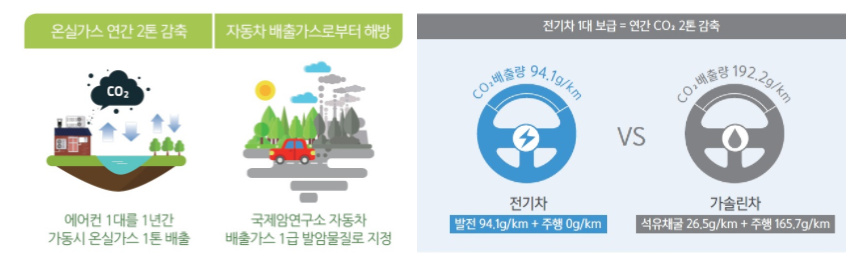

실제 데이터를 토대로 CO2 배출량의 감소율을 분석해 보았다.

In [ ]:
src = 'https://raw.githubusercontent.com/han-juyoung/DAP/main/Finals/Data/annual-global-emissions-of-carbon-dioxide.csv'
df = pd.read_csv(src, index_col='Year')
df['증가율'] = 100 * df['CO2(billion metric tons)'].pct_change()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.index, df['CO2(billion metric tons)'])
df['linregress'] = slope * df.index + intercept
slope_2010, intercept_2010, r_value, p_value, std_err = stats.linregress(df.tail(12).index, df['CO2(billion metric tons)'].tail(12))
df['linregress(2010_2021)'] = slope_2010 * df.index + intercept_2010

fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=("글로벌 CO2 배출량 추이", "글로벌 CO2 배출 증가율"),
    specs=[[{"type": "xy"}], [{"type": "bar"}]]
)
fig.add_trace(go.Scatter(
    name='CO2 배출량', x=df.index, y=df['CO2(billion metric tons)'],
    mode='lines', showlegend=True
), row=1, col=1)
fig.add_trace(go.Scatter(
    name='CO2 배출량(선형회귀)', x=df.index, y=df['linregress'],
    mode='lines', showlegend=True
), row=1, col=1)
fig.add_trace(go.Scatter(
    name='CO2 배출량(선형회귀 2010~2021)', x=df.tail(12).index, y=df['linregress(2010_2021)'],
    mode='lines', showlegend=True
), row=1, col=1)
fig.add_trace(go.Bar(
    name='CO2 배출증가율', x=df.index, y=df['증가율'],
    showlegend=True
), row=2, col=1)
fig.update_layout(dict(
    title='[Fig.1] 글로벌 CO2 배출량 및 증가율',
    height=700,
    xaxis=dict(title='연도'), yaxis=dict(title='배출량[10억 Mt]'),
    xaxis2=dict(title='연도'), yaxis2=dict(title='증가율[%]')
))
fig.show()

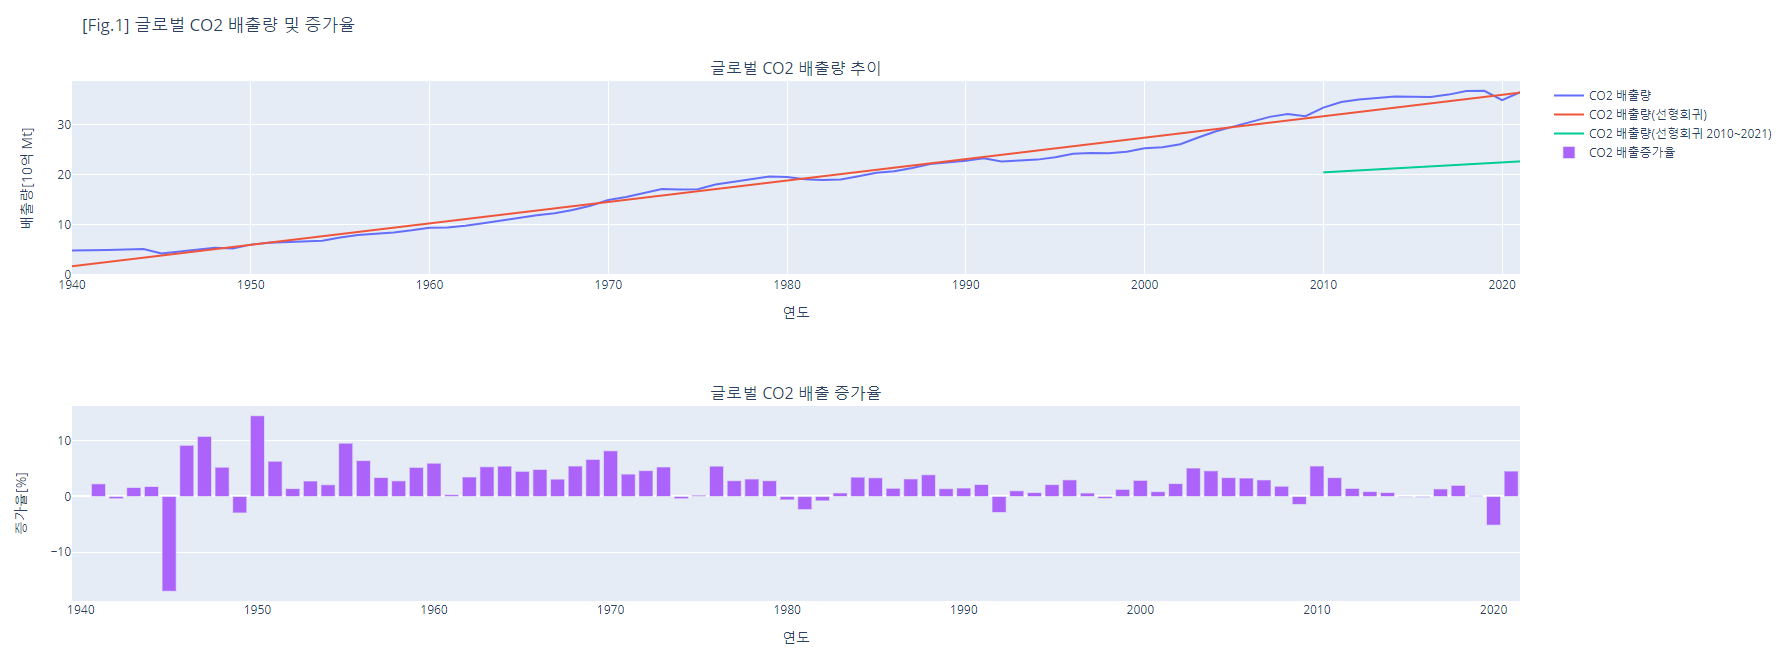

온실 가스 배출 증가량이 줄어드는 배경에는 다양한 노력이 있는데, 그 중 전기자동차 보급의 증가를 한 가지 이유로 꼽을 수 있다. 전기자동차는 주행 및 충전 간 발생하는 온실가스가 0(Zero)에 수렴하며 그에 따라 도심 속 스모그, 미세먼지 등의 저감효과도 동시에 누릴 수 있다.

위 두개의 그래프 중 첫번째 그래프는 글로벌 CO2 배출량 추이이다. 1940년부터 2021년까지 Regression을 이용해서 그래프를 그린 결과 증가하는 것 처럼 보인다(빨간색 그래프). 그러나 2010년부터 2021년의 그래프(초록색 그래프)를 보면 그래프의 기울기가 감소한다. 
두번째 그래프는 각 시기별 배출 증가율을 나타내는 그래프이다. 이 그래프 역시 2010년 초부터 배출 증가율이 감소하는 모습을 보인다.

이 그래프들을 토대로 2010년부터 2021년까지는 오히려 CO2 배출량이 감소했다는 것을 확인할 수 있었다. 이 시기가 전기차가 도입된 시기라는 것과 연관지어 생각해본다면 전기차가 CO2 배출을 감소시키는것에 도움을 줄 수 있다는 것을 알 수 있다.

---
#본론 
그러나 적극적인 전기 자동차 보급 전략에도 불구하고 국내에는 전기 자동차 충전소 부족 등의 이유로 한계점이 드러나고 있는 것이 현실이다.
이러한 실태에 대한 데이터 분석 및 시각화를 통하여 문제를 알아보고 나아가 대응 방안을 생각해보았다.

# 충전소 당 전기차 보급 현황

<b>[ 자료 출처 ]</b><br>
- 전국 전기차 보급대수: https://www.data.go.kr/data/15039554/fileData.do<br>
- 전국 전기차 충전소 현황: https://www.data.go.kr/data/15039555/fileData.do<br>

In [ ]:
url_charge = 'https://raw.githubusercontent.com/han-juyoung/DAP/main/Finals/Data/kepco_chargecenter_2020.csv'
df_charge = pd.read_csv(url_charge, encoding='euc-kr')
url_vehicle = 'https://raw.githubusercontent.com/han-juyoung/DAP/main/Finals/Data/kepco_vehicle_2020.csv'
df_vehicle = pd.read_csv(url_vehicle, encoding='utf-8')
df_ve = df_vehicle.set_index(keys='기준일')
df_ve = df_ve.drop(columns=['합계'])
df_ve = df_ve.reindex(sorted(df_ve.columns), axis=1)

In [ ]:
df_ch = df_charge.set_index(keys='지역')
df_ch.index.name = None
df_ch = df_ch.T.drop(index=['2016', '2017'])
df_ch = df_ch.reindex(sorted(df_ch.columns), axis=1)

In [ ]:
y_charge = ['2018', '2019', '2020']
n_charge = []
for i in y_charge:
  x = df_charge[i].sum()
  n_charge.append(x)

y_vehicle = df_vehicle['기준일']
n_vehicle = df_vehicle['합계']



아래[Fig. 3]는 지역별 전기차 보급 현황과 지역별 전기차 충전소 현황에 대해서 나타내었다. 지난 한 해동안 전국평균 전기차가 증가한 비율은 약 115.32%로 비약적인 증가를 기록하였다. 이와 유사하게 충전소 또한 큰 폭으로 증가하였으나 약 84%로 전기차 증가율에 미치지 못하였다. 이는 충전 비효율을 야기할 수 있다. 각 지역별로 불균형이 심화되는 모습이 더욱 두드러진다.

출처 : https://www.ev.or.kr/portal/board/bbs/

In [ ]:
fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=("전국 전기차와 충전소", "충전소 1기당 전기차 수"),
    specs=[[{"type": "bar"}], [{"type": "xy"}]]
)
fig.add_trace(go.Bar(
    name='지역별 전기차수(2020)', x=df_ve.columns, y=df_ve.loc[2020],
    opacity=0.8,
    visible=True, showlegend=True
), row=1, col=1)
fig.add_trace(go.Bar(
    name='지역별 충전기수(2020)', x=df_ve.columns, y=df_ch.loc['2020'],
    opacity=0.8,
    visible=True, showlegend=True
), row=1, col=1)
y_rate = df_ve.loc[2020].values/df_ch.loc['2020'].values
fig.add_trace(go.Scatter(
    name='지역별 충전기 당 전기차 수', x=df_ve.columns, y=y_rate,
    visible=True, showlegend=True
), row=2, col=1)
fig.add_trace(go.Scatter(
    name='평균', x=df_ve.columns, y=[y_rate.mean()]*len(df_ve.columns),
    mode='lines', line=dict(dash='dot', width=0.8, color='black'),
    visible=True, showlegend=True
), row=2, col=1)
fig.update_layout(dict(
    title='[Fig. 3] 전국 전기자동차 보급(대수) 및 충전소(기수)',
    height=700,
    xaxis=dict(title='지역별'), 
    yaxis=dict(title='수'),
    xaxis2=dict(title='지역별'), 
    yaxis2=dict(title='수')
))
fig.show()


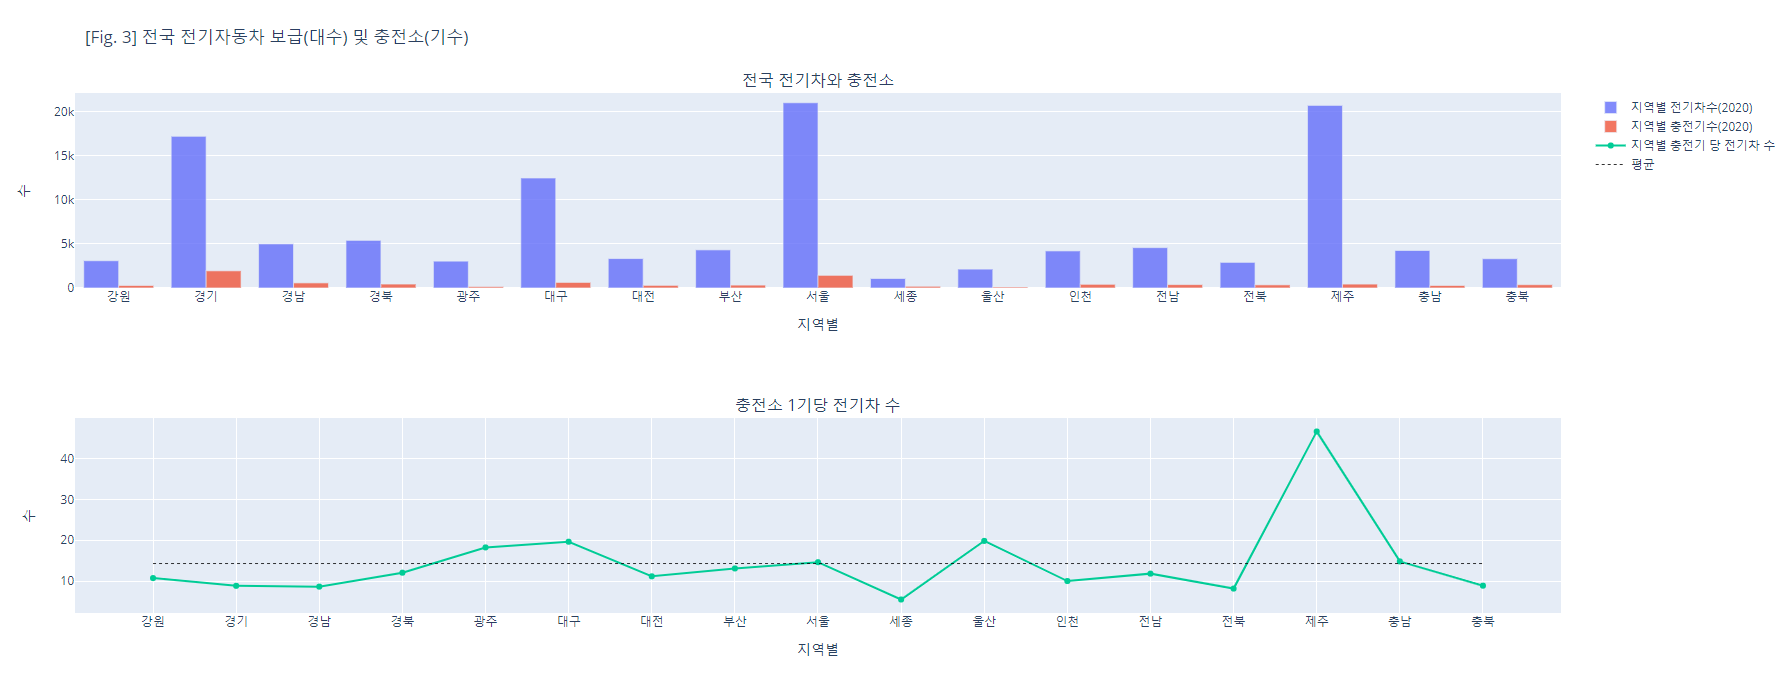

# 그래프 분석과 개선방안
위의 그래프에서는 전국 강원부터 충북까지 지역별로 전기차와 충전소를 나타낸 모습이다. 지역별 전기차수로는 서울이 제일 크고 그 다음 서울과 비슷한 제주, 경기, 대구 순으로 전기차 보급수가 많다. 지역별 충전기 수는 경기가 가장 많고 그 다음이 서울이고 대구 경남 순이다.<br><br>

이 결과를 토대로 충전소 1기당 전기차 수를 분석해보았다. 점선으로 평균을 나타내었다. 제주가 가장 크게 두드러진 모습인데 제주가 전기차수 대비 충전기 수가 가장 부족한 지역이고, 그 다음은 울산, 대구, 광주이다.
다른지역에 비해 충전소가 비교적 덜 부족해 보이는 지역은 세종, 전북, 충북, 인천, 대전 이다.

전기차 수에 비해 충전소가 부족한것, 거기다가 지역별로 보이는 불균형이 더 많은 보급을 저해하는 원인이라고 생각한다. <br>
환경부가 올해 9월 국민 2,600명을 대상으로 전기차 충전인프라에 대한 인식을 조사한 결과, 전기차 불편 요인으로 충전기 부족(55.8%)이, 충전기 사용불편 요인으로 긴 충전시간(46.3%)이 각각 1위에 꼽혔다. <br>
[출처] 전기차 충전인프라 인식조사 결과('18.9., 2,600여명)<br><br>

개선할 수 있는 방법은 전국의 시청, 구청, 우체국, 공공도서관, 경찰서 등의 공공기관 중심의 급속 충전소들이 많아질수록 사용자들이 더욱 편리하게 사용할 것이고, 이것이 전기차의 원활한 보급에도 영향을 끼칠 것이라고 생각한다. 또한 충전기의 사후관리도 필수적이라고 생각한다.

# 전국 충전소 분포

전국 충전소 분포는 지역별 분포의 편향성을 확인할 수 있다.[Fig.4]

In [ ]:
url = 'https://raw.githubusercontent.com/han-juyoung/DAP/main/Finals/Data/%EC%A0%84%EA%B5%AD%EC%A0%84%EA%B8%B0%EC%B0%A8%EC%B6%A9%EC%A0%84%EC%86%8C%ED%91%9C%EC%A4%80%EB%8D%B0%EC%9D%B4%ED%84%B0.csv'
df = pd.read_csv(url, encoding = 'euc-kr')
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon=df['경도'], lat=df['위도'],
    text=df['충전소명'], marker=dict(size=2, color='royalblue')
))

min_lat = df['위도'].min()
max_lat = df['위도'].max()
min_lon = df['경도'].min()
max_lon = df['경도'].max()

fig.update_layout(
    title = '[Fig. 4] 전국 지역별 전기차 충전소 분포',
    height=700,
    geo = go.layout.Geo(
        resolution = 50,
        scope = 'asia',
        showframe = False, showcoastlines = True, showocean=True,
        landcolor = "rgb(229, 229, 229)", oceancolor = 'lightblue',
        countrycolor = "white" ,
        coastlinecolor = "white",
        projection_type = 'mercator',
        lonaxis_range= [ 0.97 * min_lon, 1.03 * max_lon ],
        lataxis_range= [ 0.97 * min_lat, 1.03 * max_lat ],
        domain = dict(x = [ 0, 1 ], y = [ 0, 1 ])
    ),
    margin={"b":0, "l":0, "r":0}
)
fig.show()

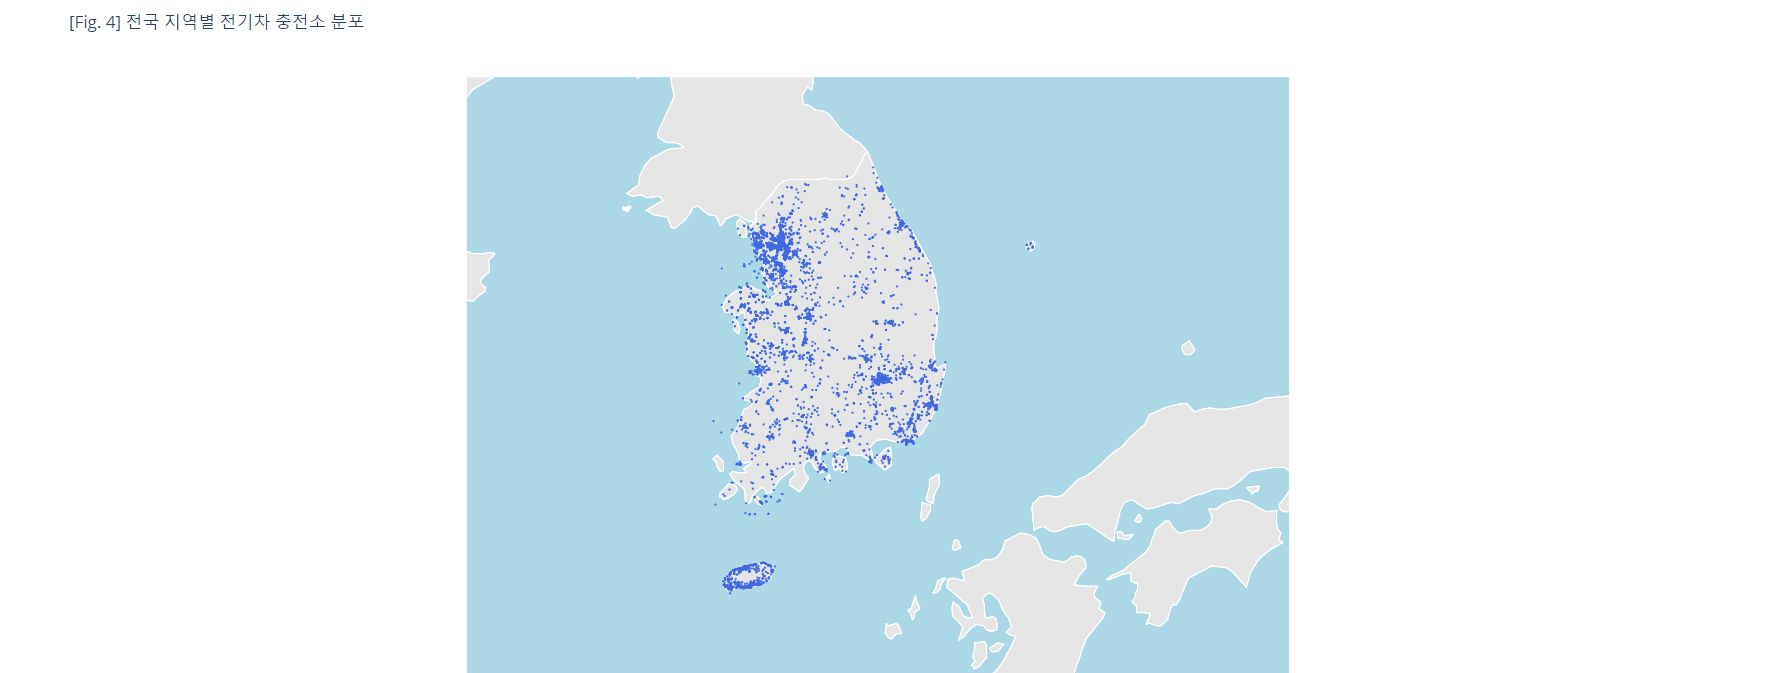

[Fig. 4]에서는 전국 각 지역의 전기충전소를 위도와 경도를 이용하여 지도에 나타내었다. 이를 통해 어느 지역에 더 많이 몰려있는지 분포를 확인할수가 있다. [Fig. 3]과 마찬가지로 서울과 경기에 많이 분포되어있는 것을 확인할 수 있었다.

[코드 레퍼런스]<br>
https://plotly.com/python/bubble-maps/<br>
https://plotly.com/python/bubble-charts/<br>
https://stackoverflow.com/questions/32327471/linear-regression-for-timeseries-python-numpy-or-pandas<br>
https://medium.com/@d.moni91/rossmann-store-sales-sales-forecasting-using-time-series-regression-in-python-1e7ad6fb0aec
